In [1]:
import pandas as pd
import numpy as np

## Playing around with the Peso Exchange rate and time series forecasting

In [2]:
df = pd.read_csv('data/peso_dollar_exchange.txt', sep='\t', header=None)

In [3]:
df.columns = ['date', 'value']

In [4]:
df.set_index(pd.DatetimeIndex(df['date']), inplace=True, drop=True)

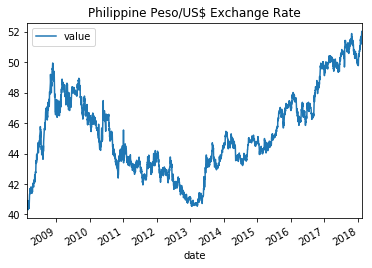

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
df.plot()
plt.title("Philippine Peso/US$ Exchange Rate")

In [6]:
df.head()

,date,value
date,,
2008-02-14,"February 14, 2008",40.9035
2008-02-15,"February 15, 2008",40.9270
2008-02-18,"February 18, 2008",40.6665
2008-02-19,"February 19, 2008",40.6265
2008-02-20,"February 20, 2008",40.6500


In [16]:
# Using a weekly mean time series for the analysis
weekly_summary = df['value'].resample('W').mean()

In [8]:
weekly_summary.head()

date
2008-02-17    40.91525
2008-02-24    40.64870
2008-03-02    40.38200
2008-03-09    40.62230
2008-03-16    41.06050
Freq: W-SUN, Name: value, dtype: float64

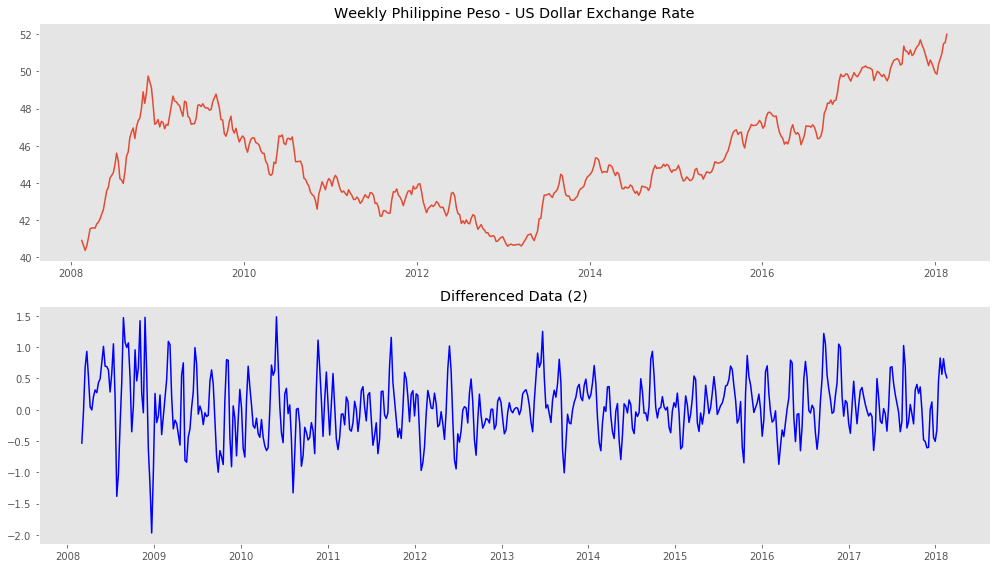

In [200]:
plt.style.use('ggplot')
fig, ax = plt.subplots(2, 1, figsize=(14, 8))
ax[0].plot(weekly_summary.index, weekly_summary)
ax[0].set_title('Weekly Philippine Peso - US Dollar Exchange Rate')
ax[0].grid(False)
ax[1].plot(weekly_summary.index, weekly_summary.diff(2), color='b')
ax[1].set_title('Differenced Data (2)')
ax[1].grid(False)
plt.tight_layout()
plt.savefig('data/peso_plot.png')


In [10]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy import signal
import scipy.stats as scs

/Applications/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [11]:
dff = weekly_summary.diff()
dff2 = weekly_summary.diff(2)

### Augmented Dickey-Fuller Test for Stationarity

In [12]:
# Augmented Dickey-Fuller test of stationarity for the Peso/Dollar Exchange Rate
test = sm.tsa.stattools.adfuller(weekly_summary)
test_diff = sm.tsa.stattools.adfuller(dff[1:])
test_diff2 = sm.tsa.stattools.adfuller(dff2[2:])


In [174]:
"""
p-value (<0.01) returned by Augmented Dickey-Fuller Test show that differencing (1 or 2 times) 
results in stationary timeseries
"""
print test[1]
print test_diff[1]
print test_diff2[1]

50.21171428571428
2.729345038224604e-10
9.254116414031324e-08


In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

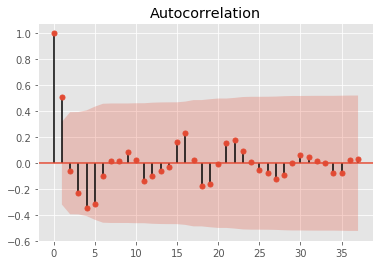

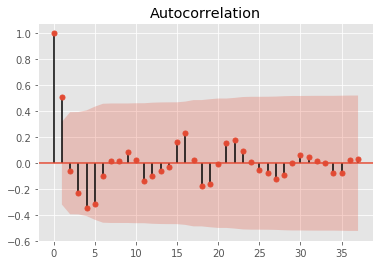

In [21]:
# Autocorrelation plot
plot_acf(weekly_summary.diff(2)[2:40])

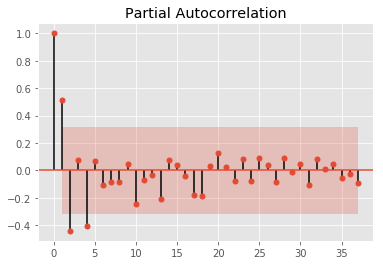

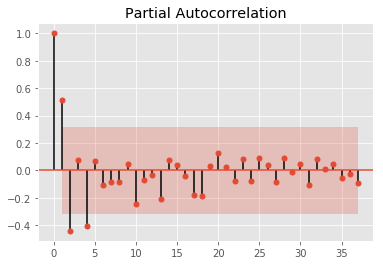

In [22]:
# Partial Autocorrelation Plot
plot_pacf(weekly_summary.diff(2)[2:40])

### ARIMA model - using (p, d, q) values of (2, 2, 1)

                             ARIMA Model Results                              
Dep. Variable:               D2.value   No. Observations:                  468
Model:                 ARIMA(2, 2, 1)   Log Likelihood                 -72.447
Method:                       css-mle   S.D. of innovations              0.282
Date:                Wed, 21 Feb 2018   AIC                            154.895
Time:                        00:47:07   BIC                            175.637
Sample:                    03-02-2008   HQIC                           163.057
                         - 02-12-2017                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -3.212e-05      0.000     -0.112      0.911      -0.001       0.001
ar.L1.D2.value     0.3407      0.047      7.195      0.000       0.248       0.433
ar.L2.D2.value    -0.1112      0.047

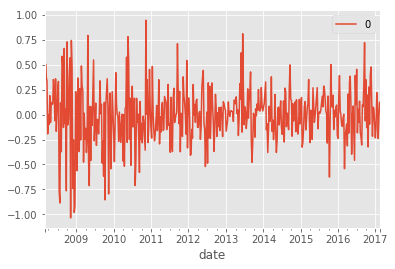

                0
count  468.000000
mean    -0.004689
std      0.283169
min     -1.034833
25%     -0.159377
50%      0.009382
75%      0.144471
max      0.944173


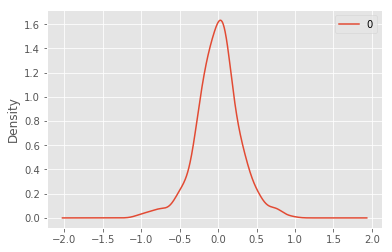

In [171]:

idx = int(len(weekly_summary) * 0.9)
train = weekly_summary[:idx]
test = weekly_summary[idx:]
model = ARIMA(train, order=(2,2,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
# pyplot.show()
print(residuals.describe())

In [30]:
train.tail()

date
2017-01-15    49.700857
2017-01-22    49.935929
2017-01-29    49.788214
2017-02-05    49.711786
2017-02-12    49.856643
Freq: W-SUN, Name: value, dtype: float64

In [194]:
peso = '₱'.decode('utf-8').encode('utf-8')


In [195]:
peso

'\xe2\x82\xb1'

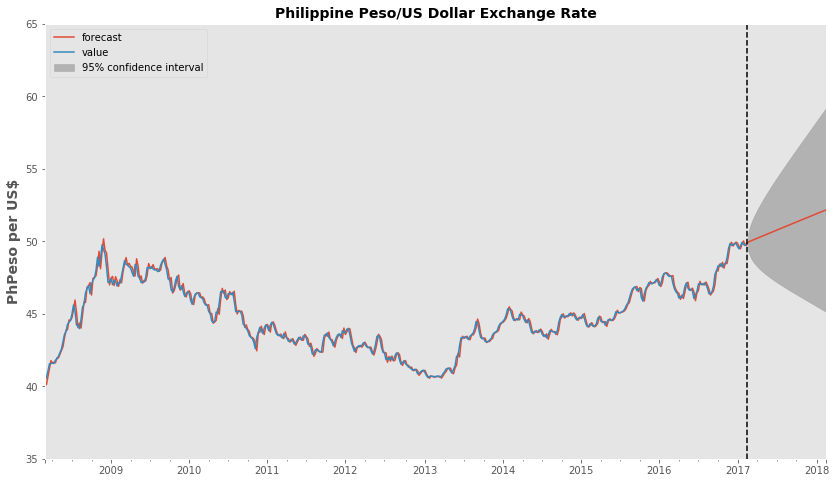

In [198]:
fig, ax = plt.subplots(figsize=(14,8))
fig = model_fit.plot_predict(start='2008-03-02', end='2018-02-18', ax=ax)
legend = ax.legend(loc='upper left')

ax.set_ylabel('PhPeso per US$', fontsize=14, fontweight='bold')
ax.set_ylim([35, 65])
ax.axvline(('2017-02-12'), color='k', linestyle='--')
ax.set_title('Philippine Peso/US Dollar Exchange Rate', fontsize=14, fontweight='bold')
ax.grid(False)
# ax.plot(test.index, test, color='blue', alpha=0.4)

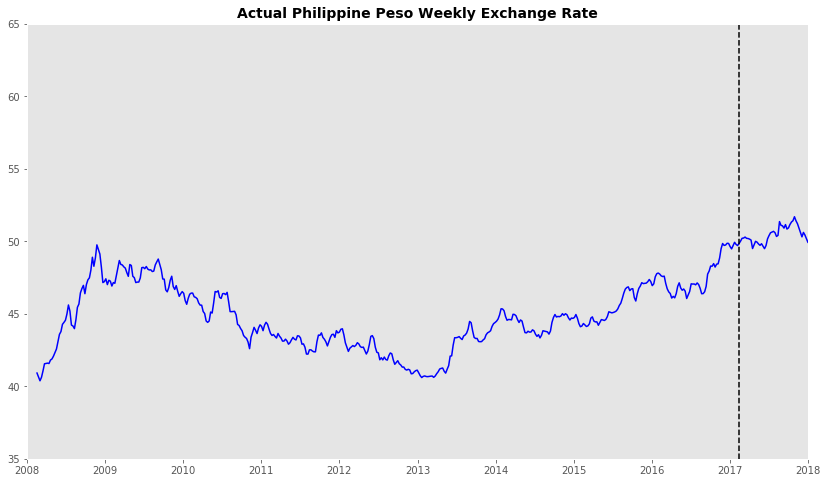

In [263]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(weekly_summary.index, weekly_summary, color='b')
ax.set_ylim([35, 65])
# ax[1].plot(weekly_summary.index, weekly_summary.diff(), color='b')
ax.set_xlim(['2008', '2018'])
ax.axvline(('2017-02-12'), color='k', linestyle='--')
ax.set_title('Actual Philippine Peso Weekly Exchange Rate',fontsize=14, fontweight='bold')
plt.grid(False)

### bitcoin timeseries analysis


In [43]:
df2 = pd.read_csv('data/bitstamp.txt', sep='\t')

In [44]:
df2.head()

,Timestamp,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
0,2014-02-16 00:00:00,655.83,670,590.01,621,26397.57,16510289.03,625.45
1,2014-02-17 00:00:00,621,664.99,610,633.66,19902.44,12681178.75,637.17
2,2014-02-18 00:00:00,633.66,650,609.99,627.7,14833.94,9305110.2,627.29
3,2014-02-19 00:00:00,627.7,636,617,623.01,11128.48,6976436.52,626.9
4,2014-02-20 00:00:00,623.01,631,560.9,561.86,34966.7,20678092.12,591.37


In [45]:
df2.set_index(pd.DatetimeIndex(df2['Timestamp']), inplace=True, drop=True)

In [46]:
del df2['Timestamp']

In [47]:
# Change to numeric data
df2['Open'] = pd.to_numeric(df2['Open'], errors='coerce')
df2['High'] = pd.to_numeric(df2['High'], errors='coerce')
df2['Low'] = pd.to_numeric(df2['Low'], errors='coerce')
df2['Close'] = pd.to_numeric(df2['Close'], errors='coerce')
df2['Volume (BTC)'] = pd.to_numeric(df2['Volume (BTC)'], errors='coerce')
df2['Volume (Currency)'] = pd.to_numeric(df2['Volume (Currency)'], errors='coerce')
df2['Weighted Price'] = pd.to_numeric(df2['Weighted Price'], errors='coerce')

In [48]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1457.0,1.661731e+03,3.093841e+03,172.00,356.78,566.58,1015.06,1.918778e+04
High,1457.0,1.729254e+03,3.249403e+03,212.84,364.80,576.00,1044.23,1.966600e+04
Low,1457.0,1.581210e+03,2.885885e+03,1.50,347.44,541.00,991.98,1.846500e+04
Close,1457.0,1.667723e+03,3.100202e+03,171.41,356.95,566.58,1023.99,1.918778e+04
Volume (BTC),1457.0,1.182871e+04,1.074147e+04,719.16,5217.76,8828.62,15109.06,1.241889e+05
Volume (Currency),1457.0,2.416413e+07,5.974150e+07,470912.14,2361490.25,4362828.50,12179087.26,7.721430e+08
Weighted Price,1457.0,1.656777e+03,3.069726e+03,189.84,355.66,565.09,1015.96,1.911024e+04


In [49]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115a753d0>,
      dtype=object)

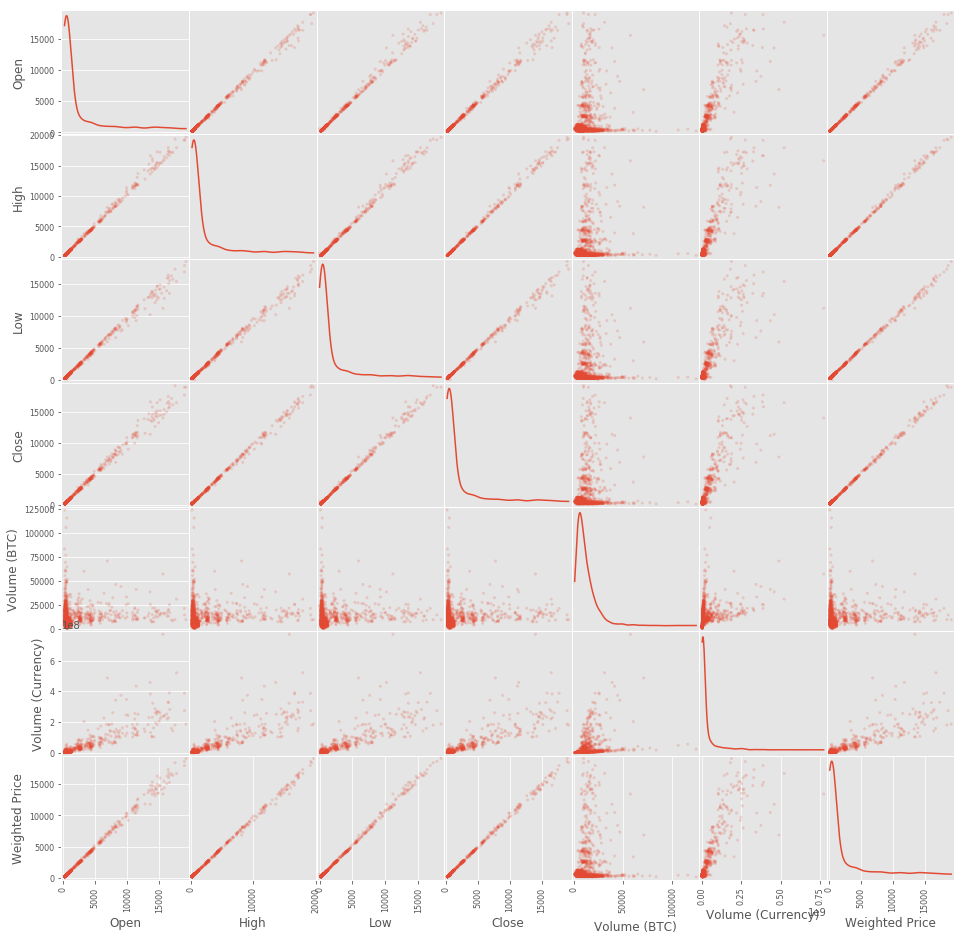

In [50]:
scatter_matrix(df2, figsize=(16, 16), alpha=0.2, diagonal='kde')


### Using Opening Price for initial Analysis

In [52]:
open_price = pd.Series(df2['Open'] , df2.index)

#### Truncating the time series

In [54]:
trunc = open_price[open_price.index > '2016-12-31']

### Plotting raw data, differenced(1) data, and log-transformed data in search of stationarity

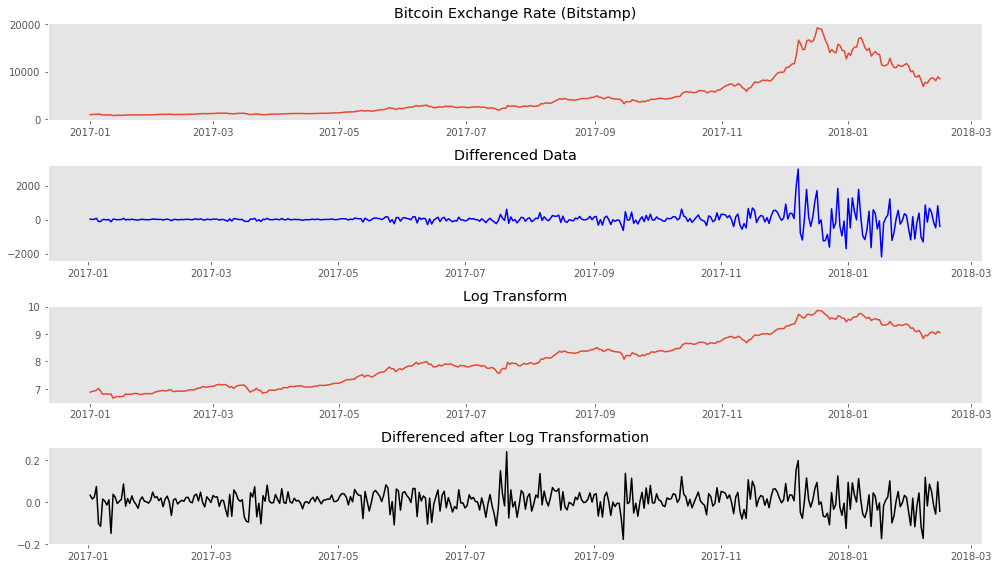

In [56]:

fig, ax = plt.subplots(4, 1, figsize=(14, 8))
ax[0].plot(trunc.index, trunc)
ax[0].set_title('Bitcoin Exchange Rate (Bitstamp)')
ax[0].grid(False)
ax[1].plot(trunc.index, trunc.diff(), color='b')
ax[1].set_title('Differenced Data')
ax[1].grid(False)
ax[2].plot(trunc.index, np.log(trunc))
ax[2].set_title('Log Transform')
ax[2].grid(False)
ax[3].plot(trunc.index, np.log(trunc).diff(), color='k')
ax[3].set_title('Differenced after Log Transformation')
ax[3].grid(False)
# ax.set_title('Philippine Peso Weekly Exchange Rate')
plt.tight_layout()

### Dickey-Fuller test shows that log-transformed and differenced data is statistically stationary

In [57]:
untrans = sm.tsa.stattools.adfuller(trunc)
diffed = sm.tsa.stattools.adfuller(trunc.diff()[1:])
logged = sm.tsa.stattools.adfuller(np.log(trunc))
log_diff = sm.tsa.stattools.adfuller(np.log(trunc).diff()[1:])
# print("ADF p-value  {0:2.2f}".format(test[1]))

In [58]:
print untrans[1], diffed[1], logged[1], log_diff[1]

0.7523839350051857 0.0018753557344981819 0.8221469344026228 0.0


In [59]:
#log transforming the data
log_trans = np.log(trunc)

In [60]:
log_trans.head()

Timestamp
2017-01-01    6.873516
2017-01-02    6.905503
2017-01-03    6.919130
2017-01-04    6.942649
2017-01-05    7.016053
Name: Open, dtype: float64

                             ARIMA Model Results                              
Dep. Variable:                D2.Open   No. Observations:                  367
Model:                 ARIMA(1, 2, 1)   Log Likelihood                 584.958
Method:                       css-mle   S.D. of innovations              0.049
Date:                Tue, 20 Feb 2018   AIC                          -1161.916
Time:                        22:58:59   BIC                          -1146.294
Sample:                    01-03-2017   HQIC                         -1155.709
                         - 01-04-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           2.96e-05   2.44e-05      1.215      0.225   -1.82e-05    7.74e-05
ar.L1.D2.Open     0.0034      0.052      0.064      0.949      -0.099       0.106
ma.L1.D2.Open    -0.9985      0.008   -1

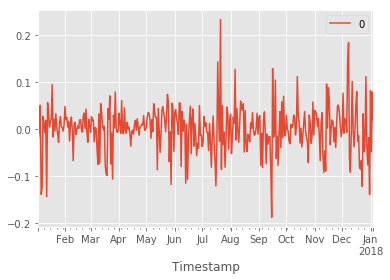

                0
count  367.000000
mean     0.000294
std      0.049241
min     -0.188247
25%     -0.018948
50%      0.001927
75%      0.026946
max      0.232873


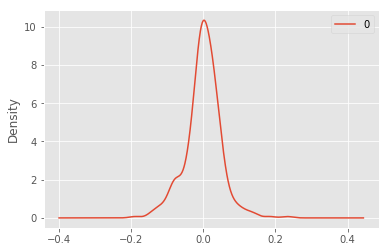

In [74]:
idx2 = int(len(log_trans) * 0.9)
train2 = log_trans[:idx2]
test2 = log_trans[idx2:]
model2 = ARIMA(train2, order=(1,2,1))
model_fit2 = model2.fit(disp=0)
print(model_fit2.summary())
# plot residual errors
residuals2 = pd.DataFrame(model_fit2.resid)
residuals2.plot()
plt.show()
residuals2.plot(kind='kde')
# pyplot.show()
print(residuals2.describe())

In [71]:
log_trans.head()

Timestamp
2017-01-01    6.873516
2017-01-02    6.905503
2017-01-03    6.919130
2017-01-04    6.942649
2017-01-05    7.016053
Name: Open, dtype: float64

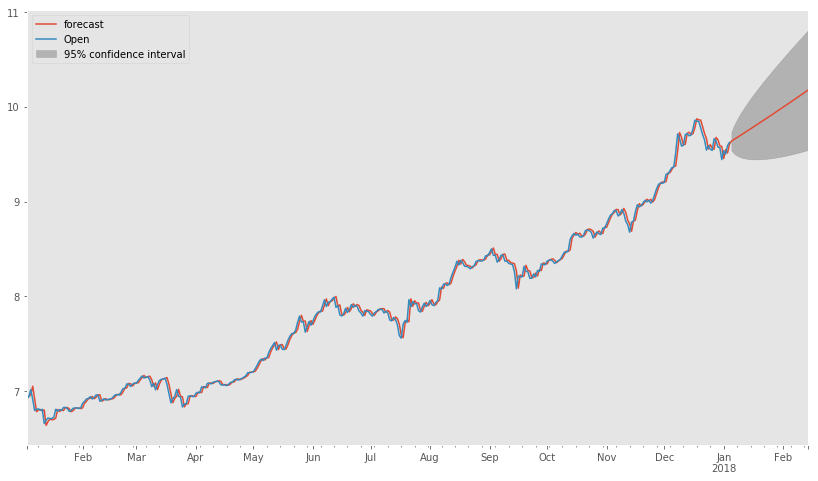

In [75]:
fig, ax = plt.subplots(figsize=(14,8))
fig = model_fit2.plot_predict(start='2017-01-03', end='2018-02-14', ax=ax)
legend = ax.legend(loc='upper left')
# ax.set_ylim([35, 65])
# ax.set_title('Philippine Peso/US Dollar Exchange Rate', fontsize=14, fontweight='bold')
ax.grid(False)
# ax.plot(test.index, test, color='blue', alpha=0.4)

## Resampled Data for weekly average - used Weighted Price

In [76]:
df2.head()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Timestamp,,,,,,,
2014-02-16,655.83,670.00,590.01,621.00,26397.57,16510289.03,625.45
2014-02-17,621.00,664.99,610.00,633.66,19902.44,12681178.75,637.17
2014-02-18,633.66,650.00,609.99,627.70,14833.94,9305110.20,627.29
2014-02-19,627.70,636.00,617.00,623.01,11128.48,6976436.52,626.90
2014-02-20,623.01,631.00,560.90,561.86,34966.70,20678092.12,591.37


In [78]:
# Resampled to get weekly mean 'weighted price'
weekly_bit = df2['Weighted Price'].resample('W').mean()

In [79]:
weekly_bit.head()

Timestamp
2014-02-16    625.450000
2014-02-23    608.385714
2014-03-02    556.078571
2014-03-09    647.455714
2014-03-16    634.421429
Freq: W-SUN, Name: Weighted Price, dtype: float64

### Plotting weekly price, differenced data, log-transformed data, and differenced log-transformed data

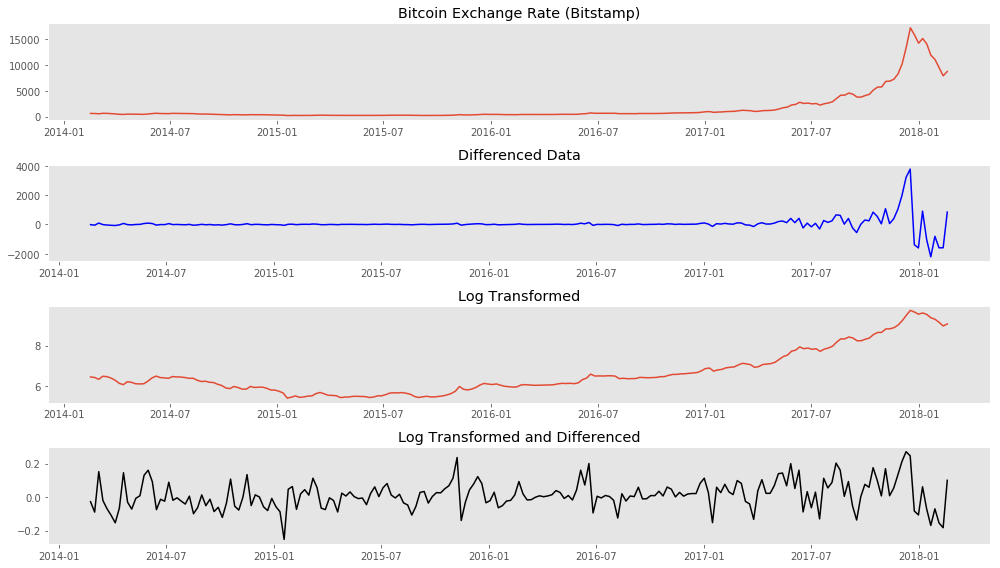

In [199]:
fig, ax = plt.subplots(4, 1, figsize=(14, 8))
ax[0].plot(weekly_bit.index, weekly_bit)
ax[0].set_title('Bitcoin Exchange Rate (Bitstamp)')
ax[0].grid(False)
ax[1].plot(weekly_bit.index, weekly_bit.diff(), color='b')
ax[1].set_title('Differenced Data')
ax[1].grid(False)
ax[2].plot(weekly_bit.index, np.log(weekly_bit))
ax[2].set_title('Log Transformed')
ax[2].grid(False)
ax[3].plot(weekly_bit.index, np.log(weekly_bit).diff(), color='k')
ax[3].set_title('Log Transformed and Differenced')
ax[3].grid(False)
# ax.set_title('Philippine Peso Weekly Exchange Rate')
plt.tight_layout()
plt.savefig('data/bitcoin_transformation')

In [87]:
untransformed = sm.tsa.stattools.adfuller(weekly_bit)
diffed_week = sm.tsa.stattools.adfuller(weekly_bit.diff()[1:])
logged_week = sm.tsa.stattools.adfuller(np.log(weekly_bit))
log_diff_week = sm.tsa.stattools.adfuller(np.log(weekly_bit).diff()[1:])
log_diff2 = sm.tsa.stattools.adfuller(np.log(weekly_bit).diff(2)[2:])

In [91]:
print untransformed[1], diffed_week[1], logged_week[1], log_diff_week[1], log_diff2[1]

1.0 0.7415161705244342 0.9943348413167271 3.0187283074518573e-18 2.0780121284723683e-05


In [84]:
# the differenced log-transformed data had the lowest ADFuller score
log_weekly_bit = np.log(weekly_bit)

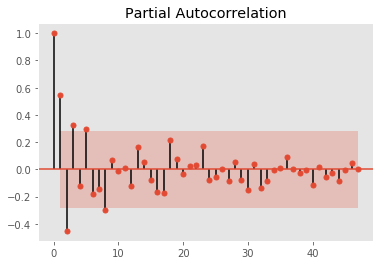

In [203]:
plot_pacf(log_weekly_bit.diff(2)[2:50])
plt.grid(False)
plt.savefig('data/bitcoin_pacf.png')

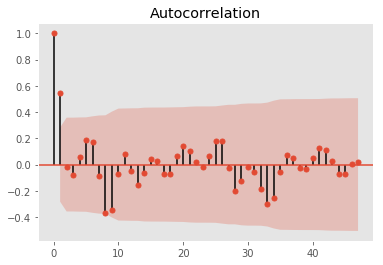

In [204]:
plot_acf(log_weekly_bit.diff(2)[2:50])
plt.grid(False)
plt.savefig('data/bitcoin_acf.png')

                             ARIMA Model Results                              
Dep. Variable:      D2.Weighted Price   No. Observations:                  176
Model:                 ARIMA(1, 2, 1)   Log Likelihood                 218.904
Method:                       css-mle   S.D. of innovations              0.069
Date:                Tue, 20 Feb 2018   AIC                           -429.807
Time:                        23:05:47   BIC                           -417.125
Sample:                    03-02-2014   HQIC                          -424.664
                         - 07-09-2017                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0004      0.000      2.930      0.004       0.000       0.001
ar.L1.D2.Weighted Price     0.1818      0.074      2.447      0.015       0.036       0.327


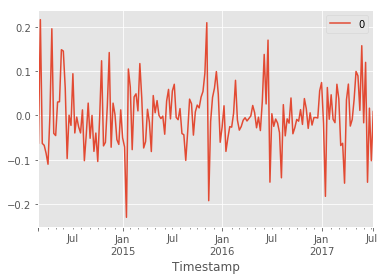

                0
count  176.000000
mean    -0.000787
std      0.070537
min     -0.230235
25%     -0.040174
50%     -0.004960
75%      0.035439
max      0.216069


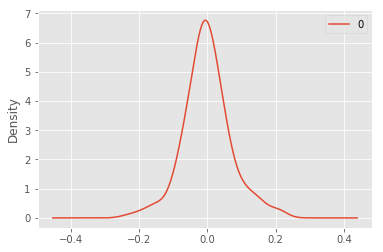

In [94]:
""" Optimization of AIC suggested that (p,d,q) values of (1,2,1) was optimal i.e. lowest AIC, BIC scores 
and best p-values for coeffs """
idx3 = int(len(log_weekly_bit) * 0.85)
train3 = log_weekly_bit[:idx3]
test3 = log_weekly_bit[idx3:]
model3 = ARIMA(train3, order=(1,2,1))
model_fit3 = model3.fit(disp=0)
print(model_fit3.summary())
# plot residual errors
residuals3 = pd.DataFrame(model_fit3.resid)
residuals3.plot()
plt.show()
residuals3.plot(kind='kde')
# pyplot.show()
print(residuals3.describe())

In [95]:
train3.head()

Timestamp
2014-02-16    6.438471
2014-02-23    6.410809
2014-03-02    6.320910
2014-03-09    6.473050
2014-03-16    6.452713
Freq: W-SUN, Name: Weighted Price, dtype: float64

In [133]:
truth = test3.head(32).values

In [132]:
forecast = (model_fit3.forecast(steps=32))

In [134]:
pred = forecast[0]

In [151]:
p_exp = np.exp(pred)

In [152]:
t_exp = np.exp(truth)

In [137]:
from sklearn.metrics import mean_squared_error

In [149]:
rmse = np.sqrt(mean_squared_error(truth, pred))

In [150]:
print 'Root MSE {}'.format(rmse)


Root MSE 0.353034310708


In [161]:
rmse_true = np.sqrt(mean_squared_error(t_exp, p_exp))
print 'RMSE of untransformed Value {}'.format(rmse_true)

RMSE of untransformed Value 3552.87928926


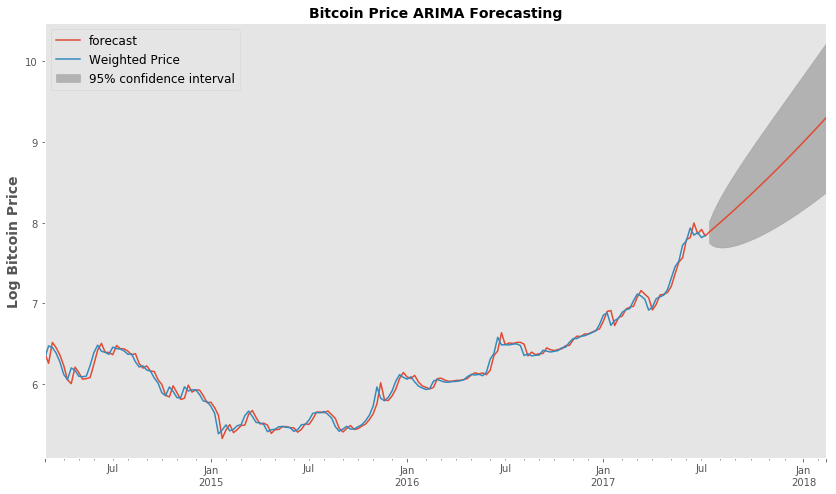

In [222]:
fig, ax = plt.subplots(figsize=(14,8))
fig = model_fit3.plot_predict(start='2014-03-02', end='2018-02-18', ax=ax)
legend = ax.legend(loc='upper left', fontsize='large')
ax.set_ylabel('Log Bitcoin Price',fontsize=14, fontweight='bold')
ax.set_title('Bitcoin Price ARIMA Forecasting', fontsize=14, fontweight='bold' )
ax.grid(False)
plt.savefig('data/confidence.png')

### Using the ARIMA forecast function

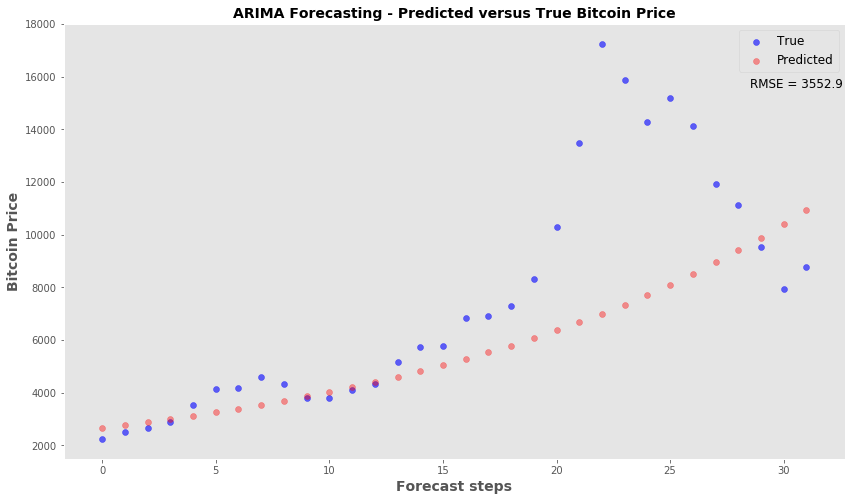

In [248]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(14,8))
x_val = range(len(truth))
ax.scatter(x_val, np.exp(truth), c='blue', label='True', alpha=0.6)
ax.scatter(x_val, np.exp(pred), c='red', alpha=0.4, label='Predicted')
ax.set_xlabel('Forecast steps', fontsize=14, fontweight='bold')
ax.set_ylabel('Bitcoin Price', fontsize=14, fontweight='bold')
ax.legend(fontsize='large', markerscale=1)
ax.grid(False)
ax.set_title('ARIMA Forecasting - Predicted versus True Bitcoin Price', fontsize=14, fontweight='bold' )
ax.text(28.5, 15600, 'RMSE = 3552.9', fontsize=12)
plt.savefig('data/forecasting.png')

In [225]:
moving = train3

### Stepwise Forecasting/Retraining ARIMA model

In [258]:
from collections import deque
moving = list(train3)
mov_test = deque(test3)
pred_steps =[]
for n in range(len(test3)):
    model = ARIMA(moving, order=(1,2,1))
    model_fit = model.fit(disp=0)
    forecast_one = model_fit.forecast(steps=1) # forecast the next time point only
    pred_steps.append(forecast_one[0])
    z = mov_test.popleft()
    moving.append(z) #update the training data with next time point
    

/Applications/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Applications/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Applications/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Applications/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Applications/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed

In [265]:
len(test3)

32

In [260]:
train3.tail()

Timestamp
2017-06-11    7.935246
2017-06-18    7.846386
2017-06-25    7.878862
2017-07-02    7.815064
2017-07-09    7.844652
Freq: W-SUN, Name: Weighted Price, dtype: float64

In [241]:
#rmse of stepwise 
np.sqrt(mean_squared_error(np.exp(test3), np.exp(pred_steps)))

1252.7893334584987

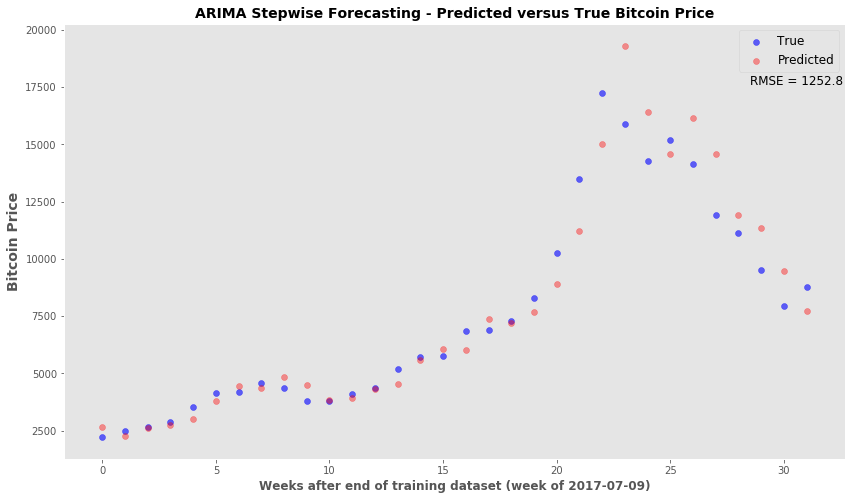

In [261]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(14,8))
x_val = range(len(test3))
ax.scatter(x_val, np.exp(test3), c='blue', label='True', alpha=0.6)
ax.scatter(x_val, np.exp(pred_steps), c='red', alpha=0.4, label='Predicted')
ax.set_xlabel('Weeks after end of training dataset (week of 2017-07-09)', fontsize=12, fontweight='bold')
ax.set_ylabel('Bitcoin Price', fontsize=14, fontweight='bold')
ax.legend(fontsize='large', markerscale=1)
ax.grid(False)
ax.set_title('ARIMA Stepwise Forecasting - Predicted versus True Bitcoin Price', fontsize=14, fontweight='bold' )
ax.text(28.5, 17600, 'RMSE = 1252.8', fontsize=12)
plt.savefig('data/forecasting_stepwise.png')